In [1]:
import sys ; sys.path.insert(0, '../')
from notebook_tools import *
import matplotlib.mlab as mlab
%matplotlib inline

In [13]:
figures_path="/Users/erezcohen/Desktop/Projects/2NSRC/alaHallAppSRCAnalysisNote/Figures/sigma_t_correction/"

# pp-SRC c.m. analysis

In [5]:
columns = ['Pmiss3Mag','pcmX','pcmY','pcmZ','rooWeight'] # ,'Mott','DipoleFF2'
data_allPmiss_noPrecFid , data300Pmiss600_noPrecFid = dict() , dict()
data_allPmiss_PrecFid , data300Pmiss600_PrecFid = dict() , dict()

for target in ['C12','Al27','Fe56','Pb208']:
    data_allPmiss_noPrecFid[target] = read_root( path+"/OrAnalysisTrees/AdjustedTrees/SRC_e2p_adjusted_300Pmiss600_%s_NoPrecFiducials.root"%target, columns=columns )
    data300Pmiss600_noPrecFid[target] = data_allPmiss_noPrecFid[target][data_allPmiss_noPrecFid[target]['Pmiss3Mag']<0.6]
#     data300Pmiss600_noPrecFid[target]['Mott*DipoleFF2']=data300Pmiss600_noPrecFid[target]['Mott']*data300Pmiss600_noPrecFid[target]['DipoleFF2']
    data_allPmiss_PrecFid[target] = read_root( path+"/OrAnalysisTrees/AdjustedTrees/SRC_e2p_adjusted_300Pmiss600_%s_PrecFiducials.root"%target, columns=columns )
    data300Pmiss600_PrecFid[target] = data_allPmiss_PrecFid[target][data_allPmiss_PrecFid[target]['Pmiss3Mag']<0.6]

In [6]:
cm_parameters = dict()
cm_parameters_with_correction = dict()
for Fiducials in ["PrecFiducials","NoPrecFiducials"]:
    cm_pars = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/300Pmiss600/alltargets_'+Fiducials+'_dataCMparameters.csv')
    cm_pars['sigma_t'] = 0.5*(cm_pars['sigma_x_unweighted']+cm_pars['sigma_y_unweighted'])
    cm_pars['sigma_tErr'] = 0.5*np.sqrt( np.square(cm_pars['sigma_xErr_unweighted']) + np.square(cm_pars['sigma_yErr_unweighted']) )
#     cm_pars['sigma_t_weighted'] = 0.5*(cm_pars['sigma_x_weighted']+cm_pars['sigma_y_weighted'])
#     cm_pars['sigma_tErr_weighted'] = 1./np.sqrt( 1./np.square(cm_pars['sigma_xErr_weighted']) + 1./np.square(cm_pars['sigma_yErr_weighted']) )
    cm_parameters[Fiducials] = cm_pars
    cm_parameters_with_correction[Fiducials] = cm_pars

## cm_parameters['PrecFiducials']

In [7]:
cm_parameters['PrecFiducials'][['sigma_x_unweighted','sigma_xErr_unweighted','sigma_y_unweighted','sigma_yErr_unweighted','sigma_z_unweighted','sigma_zErr_unweighted']]

,sigma_x_unweighted,sigma_xErr_unweighted,sigma_y_unweighted,sigma_yErr_unweighted,sigma_z_unweighted,sigma_zErr_unweighted
0,0.158378,0.006865,0.161638,0.007007,0.147251,0.006384
1,0.181341,0.013666,0.166910,0.012570,0.141058,0.010629
2,0.178723,0.008388,0.185658,0.008706,0.150658,0.007069
3,0.196040,0.020634,0.164304,0.017300,0.169545,0.017832


In [8]:
cm_parameters['PrecFiducials'][['mean_x_unweighted','mean_xErr_unweighted','mean_y_unweighted','mean_yErr_unweighted','mean_z_unweighted','mean_zErr_unweighted']]

,mean_x_unweighted,mean_xErr_unweighted,mean_y_unweighted,mean_yErr_unweighted,mean_z_unweighted,mean_zErr_unweighted
0,-0.026697,0.009711,-0.005837,0.009910,0.106593,0.009028
1,-0.035170,0.019329,0.017157,0.017791,0.118663,0.015036
2,-0.027254,0.011862,-0.009223,0.012322,0.149765,0.009999
3,-0.024147,0.029217,0.016012,0.024489,0.177513,0.025269


In [9]:
cm_parameters['NoPrecFiducials'][['target','sigma_x_unweighted','sigma_xErr_unweighted','sigma_y_unweighted','sigma_yErr_unweighted','sigma_t','sigma_tErr']]

,target,sigma_x_unweighted,sigma_xErr_unweighted,sigma_y_unweighted,sigma_yErr_unweighted,sigma_t,sigma_tErr
0,$^{12}$C,0.154505,0.006371,0.159606,0.006581,0.157056,0.004580
1,$^{27}$Al,0.183751,0.013470,0.171708,0.012577,0.177730,0.009215
2,$^{56}$Fe,0.175548,0.007898,0.185311,0.008333,0.180429,0.005741
3,$^{208}$Pb,0.190268,0.019198,0.160862,0.016236,0.175565,0.012571


saved /Users/erezcohen/Desktop/Projects/2NSRC/alaHallAppSRCAnalysisNote/Figures/sigma_t_correction/MeasuredDistributions/MeasuredDistributionC12.pdf
saved /Users/erezcohen/Desktop/Projects/2NSRC/alaHallAppSRCAnalysisNote/Figures/sigma_t_correction/MeasuredDistributions/MeasuredDistributionAl27.pdf
saved /Users/erezcohen/Desktop/Projects/2NSRC/alaHallAppSRCAnalysisNote/Figures/sigma_t_correction/MeasuredDistributions/MeasuredDistributionFe56.pdf
saved /Users/erezcohen/Desktop/Projects/2NSRC/alaHallAppSRCAnalysisNote/Figures/sigma_t_correction/MeasuredDistributions/MeasuredDistributionPb208.pdf


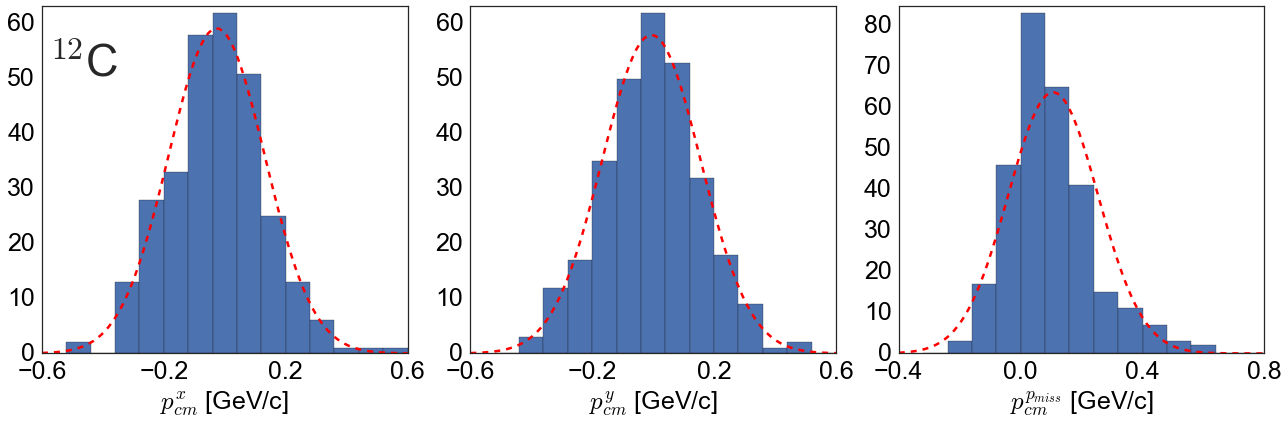

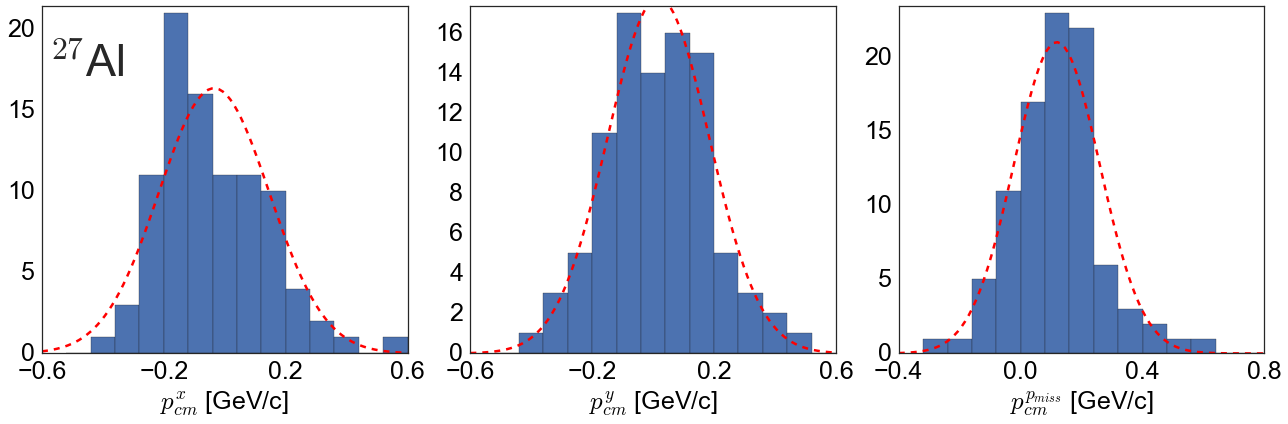

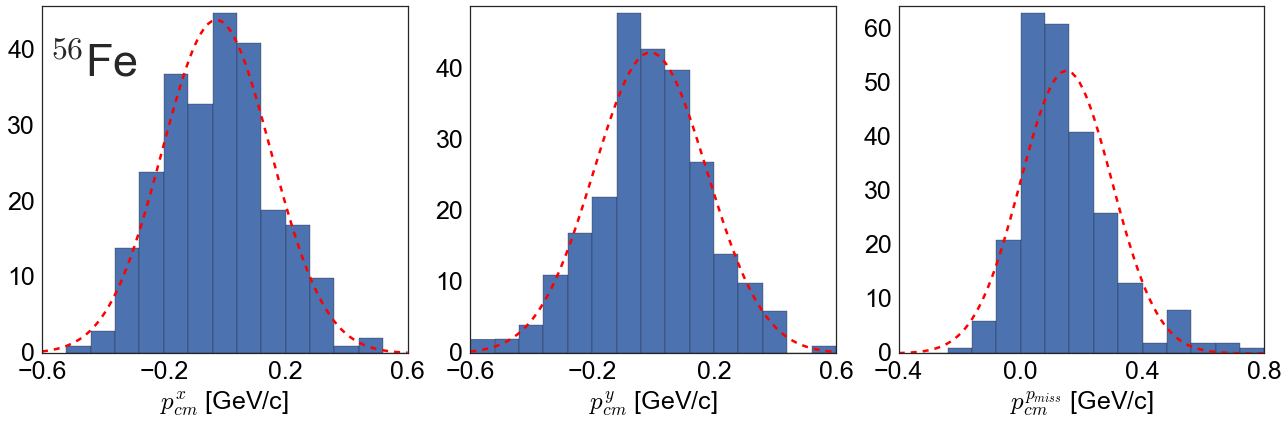

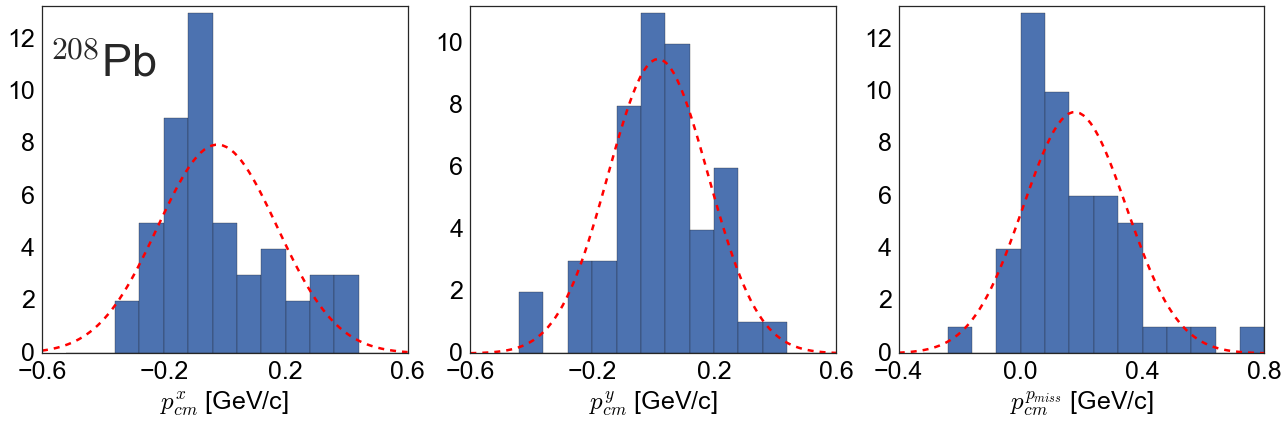

In [14]:
cm_pars = cm_parameters['PrecFiducials']

for target,name in zip(['C12','Al27','Fe56','Pb208']
                       ,['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']):
    weight_name = ''
    fig=plt.figure(figsize=(18,6))
    for i,(cm_pars_dir,direction,label) in enumerate(zip(['x','y','z']
                                                         ,['X','Y','Z']                                             
                                                         ,['x','y','p_{miss}'])):
        ax=fig.add_subplot(1,3,i+1)
        x = data300Pmiss600_noPrecFid[target]['pcm'+direction]
        xmin = -0.6 if i<2 else -0.4       
        xmax = 0.6 if i<2 else 0.8
        bins=np.linspace(xmin,xmax,16)

        if weight_name != '':
            weights = 1./data300Pmiss600[target][weight_name]
        else: weights=None
        h,bins,_=plt.hist( x,  weights=weights , bins=bins)
        NormFact = len(x)*(bins[1]-bins[0])
        cm_pars_target = cm_pars[cm_pars['target']==name]
        mean = float(cm_pars_target['mean_'+cm_pars_dir+'_unweighted'])
        sigma = float(cm_pars_target['sigma_'+cm_pars_dir+'_unweighted'])
        set_axes(ax,'$p_{cm}^{%s}$ [GeV/c]'%label, xticks=np.linspace(xmin,xmax,4)
#                  ,title='$\\mu_{%s}=%.3f, \\sigma_{%s}=%.3f$ GeV/c'%(label,mean,label,sigma)
                )
        x_v = np.linspace(xmin,xmax,100)
        plt.plot( x_v , NormFact*mlab.normpdf(x_v, mean, sigma),'--',color='red',linewidth=2.5)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(0,1.02*np.max(h))

        if direction=='X': 
            plt.text( xmin+0.02*(xmax-xmin), 0.8*np.max(ax.get_ylim()), name , fontsize=45)
    plt.tight_layout()
    outfilename = figures_path+'MeasuredDistributions/MeasuredDistribution'+target+'.pdf' 
    print 'saved ' + outfilename
    plt.savefig(outfilename)

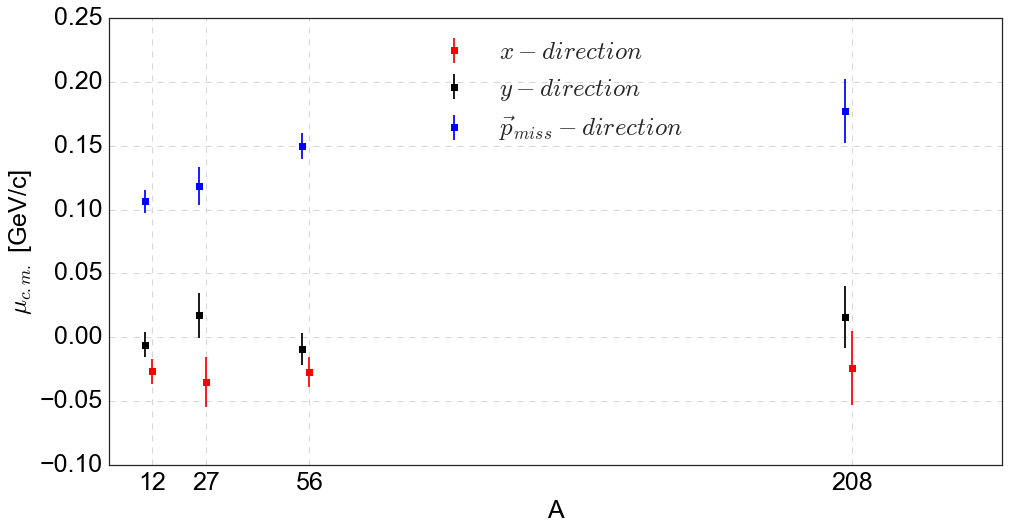

In [15]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
ax.errorbar(x=cm_pars['A'],y=cm_pars['mean_x_unweighted'],yerr=cm_pars['mean_xErr_unweighted'],fmt='s',color='red',label='$x-direction$')
ax.errorbar(x=cm_pars['A']-2,y=cm_pars['mean_y_unweighted'],yerr=cm_pars['mean_yErr_unweighted'],fmt='s',color='black',label='$y-direction$')
ax.errorbar(x=cm_pars['A']-2,y=cm_pars['mean_z_unweighted'],yerr=cm_pars['mean_zErr_unweighted'],fmt='s',color='blue',label='$\\vec{p}_{miss}-direction$')
set_axes(ax,'A','$\\mu_{c.m.}$ [GeV/c]')
ax.xaxis.set_ticks([12,27,56,208])
ax.grid(linestyle='--',alpha=0.8)
ax.legend(fontsize=25,loc='upper center')
outfilename = figures_path + 'mean_cm_Adependence.pdf'
plt.savefig(outfilename)

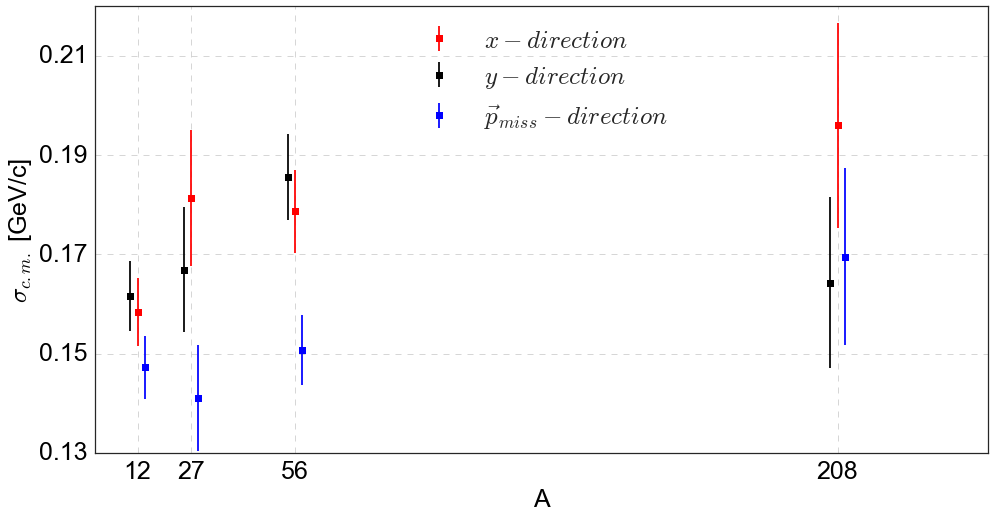

In [16]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
ax.errorbar(x=cm_pars['A'],y=cm_pars['sigma_x_unweighted'],yerr=cm_pars['sigma_xErr_unweighted'],fmt='s',color='red',label='$x-direction$')
ax.errorbar(x=cm_pars['A']-2,y=cm_pars['sigma_y_unweighted'],yerr=cm_pars['sigma_yErr_unweighted'],fmt='s',color='black',label='$y-direction$')
ax.errorbar(x=cm_pars['A']+2,y=cm_pars['sigma_z_unweighted'],yerr=cm_pars['sigma_zErr_unweighted'],fmt='s',color='blue',label='$\\vec{p}_{miss}-direction$')
set_axes(ax,'A','$\\sigma_{c.m.}$ [GeV/c]')
ax.xaxis.set_ticks([12,27,56,208]);ax.yaxis.set_ticks([0.13,0.15,0.17,0.19,0.21]);
ax.grid(linestyle='--',alpha=0.8)
ax.legend(fontsize=25,loc='upper center')
outfilename = figures_path + 'sigma_cm_Adependence.pdf'
plt.savefig(outfilename)

In [17]:
simulation_results = dict()
test_names = []
for Fiducials in ["PrecFiducials","NoPrecFiducials"]:
    for target in ['C','Al','Fe','Pb']:#{
            test_name = "sims_300Pmiss600_"+target+"_"+Fiducials
            test_names.append(test_name)    
            simulation_results[test_name] = pd.read_csv("/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation_300Pmiss600/"+test_name+'.csv')
            simulation_results[test_name].fillna(-1,inplace=True)
            print len(simulation_results[test_name]),'events in ',test_name

6000 events in  sims_300Pmiss600_C_PrecFiducials
6000 events in  sims_300Pmiss600_Al_PrecFiducials
6000 events in  sims_300Pmiss600_Fe_PrecFiducials
6149 events in  sims_300Pmiss600_Pb_PrecFiducials
5900 events in  sims_300Pmiss600_C_NoPrecFiducials
5900 events in  sims_300Pmiss600_Al_NoPrecFiducials
5900 events in  sims_300Pmiss600_Fe_NoPrecFiducials
5551 events in  sims_300Pmiss600_Pb_NoPrecFiducials


In [18]:
def find_x_poly(poly,y0,xmin=0,xmax=0.3):
    p = np.poly1d(poly)
    roots = (p - y0).roots
    for root in roots:
        if xmin<root and root<xmax:
            x_poly = root
    return x_poly

In [19]:
def plot_cm_direction(simulations_results=None
                      ,Fiducials='PrecFiducials'
                      ,ax=None,A=12
                      ,poly_degree=3
                      ,confidence_interval = 0.68
                      ,direction='x',colors=['blue','royalblue'],s=50
                      ,debug=0):

    gen,rec = simulations_results['gen_Sigma_t'],simulations_results['rec_sigma_'+direction]
    plt.scatter(gen,rec,color=colors[1],label='generated vs. reconstructed',s=s)

    # fit a polynomial of order 2
    popt,cov = np.polyfit( gen,rec , poly_degree , cov=True)
    perr = np.sqrt(np.diag(cov))
    if debug:
        print "popt:",popt 
        print  "perr:",perr
    
    x = np.linspace(np.min(ax.get_xlim()),np.max(ax.get_xlim()),1000)
    poly = np.poly1d(popt)
    ax.plot(x,poly(x),'-',color='black',linewidth=2,label='best fit')
    
    # Convert to percentile point of the normal distribution [https://en.wikipedia.org/wiki/Standard_score]
    pp = (1. + confidence_interval) / 2.
    # Convert to number of standard deviations.
    nstd = stats.norm.ppf(pp)
    
    # Add nstd standard deviations to parameters to obtain the upper confidence interval
    poly_up = np.poly1d(popt + nstd * perr)
    ax.plot(x,poly_up(x),'-',color='gray',linewidth=2)
    poly_dw = np.poly1d(popt - nstd * perr)
    ax.plot(x,poly_dw(x),'-',color='gray',linewidth=2)

    cm_pars_target = cm_pars[cm_pars['A']==A]
    index = cm_pars[cm_pars['A']==A].index
    # reconstructed \sigma in data
    sigma_meas, sigma_meas_err = float(cm_pars_target['sigma_'+direction+'_unweighted']), float(cm_pars_target['sigma_'+direction+'Err_unweighted'])
    y =  np.ones(len(x)) * sigma_meas
    yErr =  np.ones(len(x)) * sigma_meas_err
    #     x_poly = find_x_poly(poly,sigma_meas)
    x_poly_up = find_x_poly(poly_dw,sigma_meas+sigma_meas_err)
    #     x_poly_up_err = x_poly_up - x_poly
    x_poly_down = find_x_poly(poly_up,sigma_meas-sigma_meas_err)
    #     x_poly_dw_err = x_poly - x_poly_down
    x_corrected = 0.5*(x_poly_up+x_poly_down)
    x_corrected_err = x_poly_up - x_corrected

    
    plt.plot( np.linspace(np.min(ax.get_xlim()),x_corrected,1000) , y , color=colors[1],label='measured: $%.3f\\pm%.3f$'%(sigma_meas, sigma_meas_err))
    plt.plot( np.linspace(np.min(ax.get_xlim()),x_poly_up,1000) , y+yErr , color=colors[1],linestyle='--')
    plt.plot( np.linspace(np.min(ax.get_xlim()),x_poly_down,1000) , y-yErr , color=colors[1],linestyle='--')

    
    # project to generated
    plt.plot( [x_corrected,x_corrected] , [np.min(ax.get_ylim()),sigma_meas] , color=colors[0]
             ,label='corrected: $%.3f \\pm %.3f$'%(x_corrected, x_corrected_err))
    plt.plot( [x_poly_up,x_poly_up] , [np.min(ax.get_ylim()),sigma_meas+sigma_meas_err] , color=colors[0] ,linestyle='--')
    plt.plot( [x_poly_down,x_poly_down] , [np.min(ax.get_ylim()),sigma_meas-sigma_meas_err] , color=colors[0] ,linestyle='--' )
    corr_value, corr_value_err = x_corrected , x_corrected_err
    
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected',corr_value)
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_err',corr_value_err)

    
    set_axes(ax,'gen. $\\sigma$ [GeV/c]','rec. $\\sigma_'+direction+'$ [GeV/c]'    
             , xticks=[0,0.05,0.1,0.15,0.2,0.25,0.3] , yticks=[0,0.05,0.1,0.15,0.2,0.25,0.3] , do_add_grid=True 
             ,title = cm_pars_target['target'].to_string(index=False) + ', $'+direction+'-direction$ ('+Fiducials+')')

    ax.legend(loc='upper left',fontsize=20,scatterpoints=3)
    ax.set_xlim(0,0.3);ax.set_ylim(0,0.3);
    return corr_value, corr_value_err

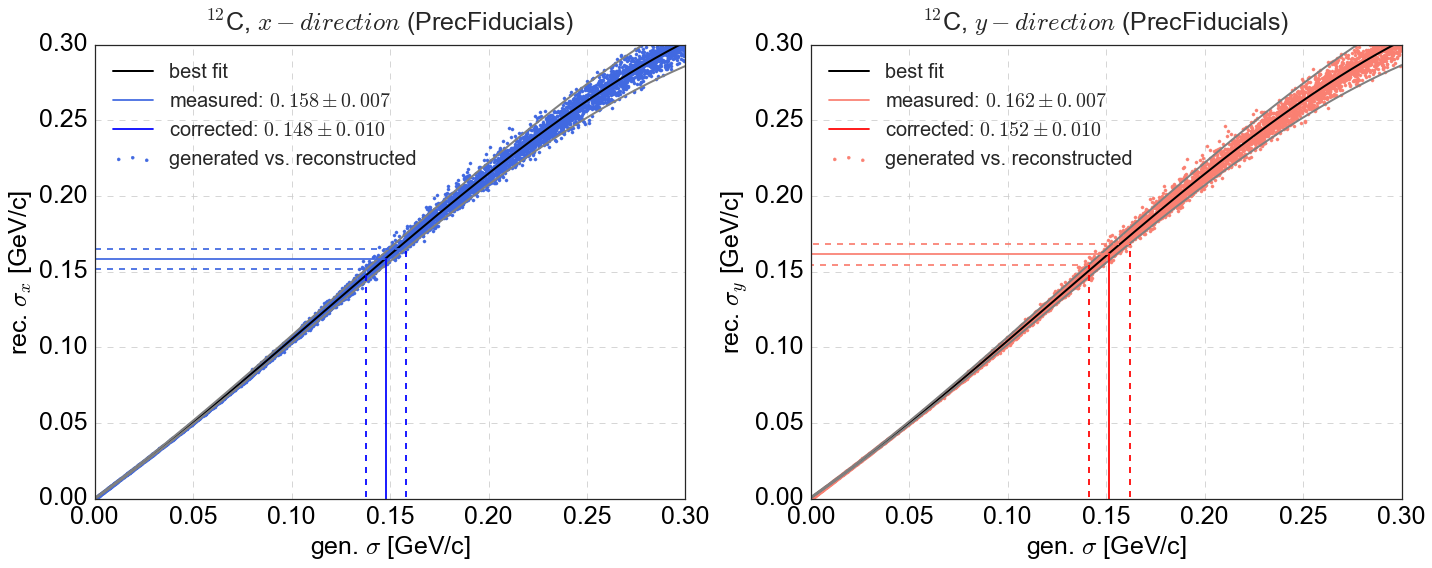

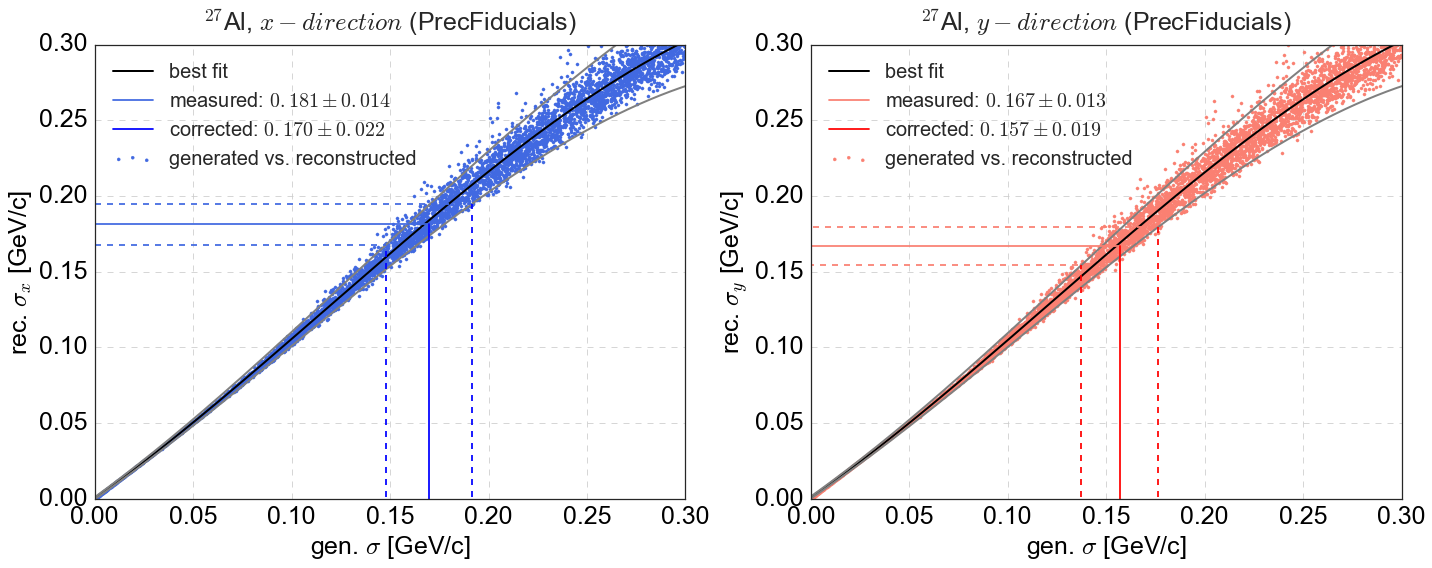

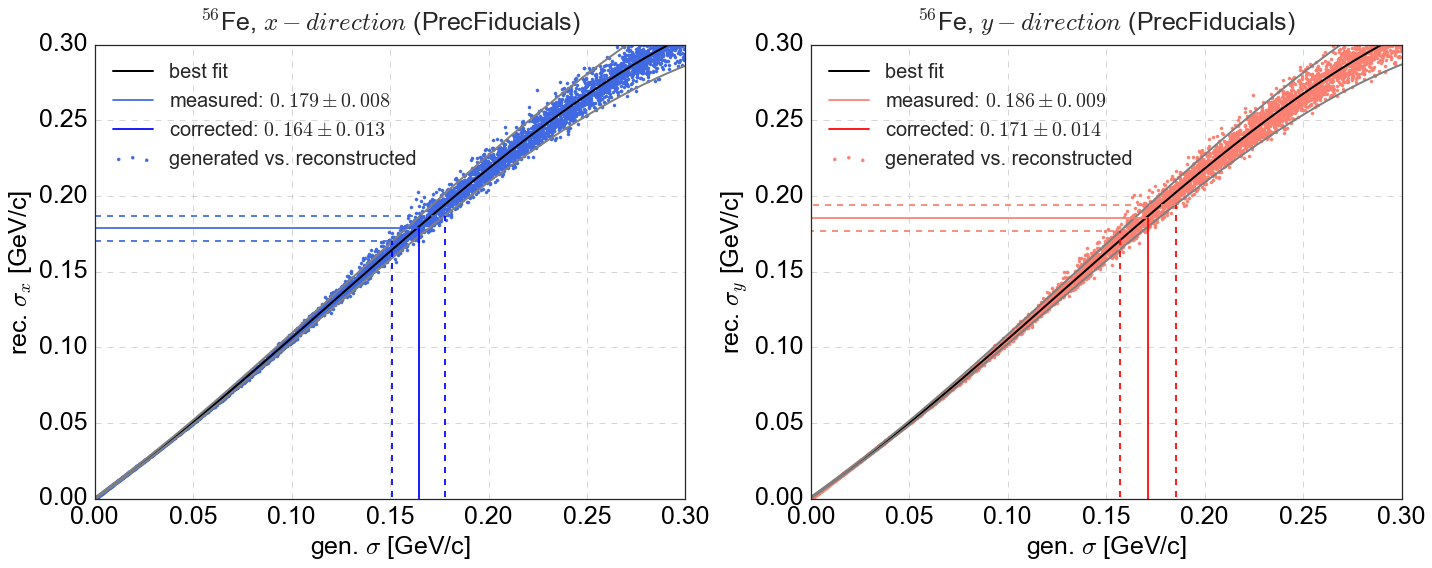

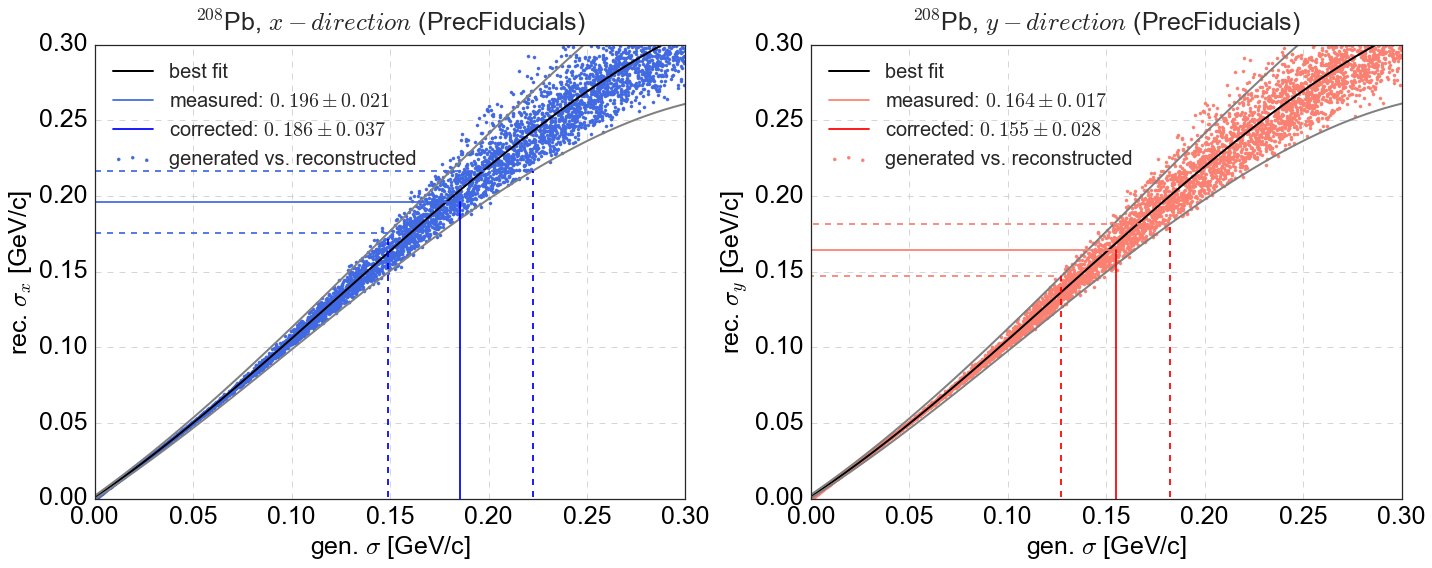

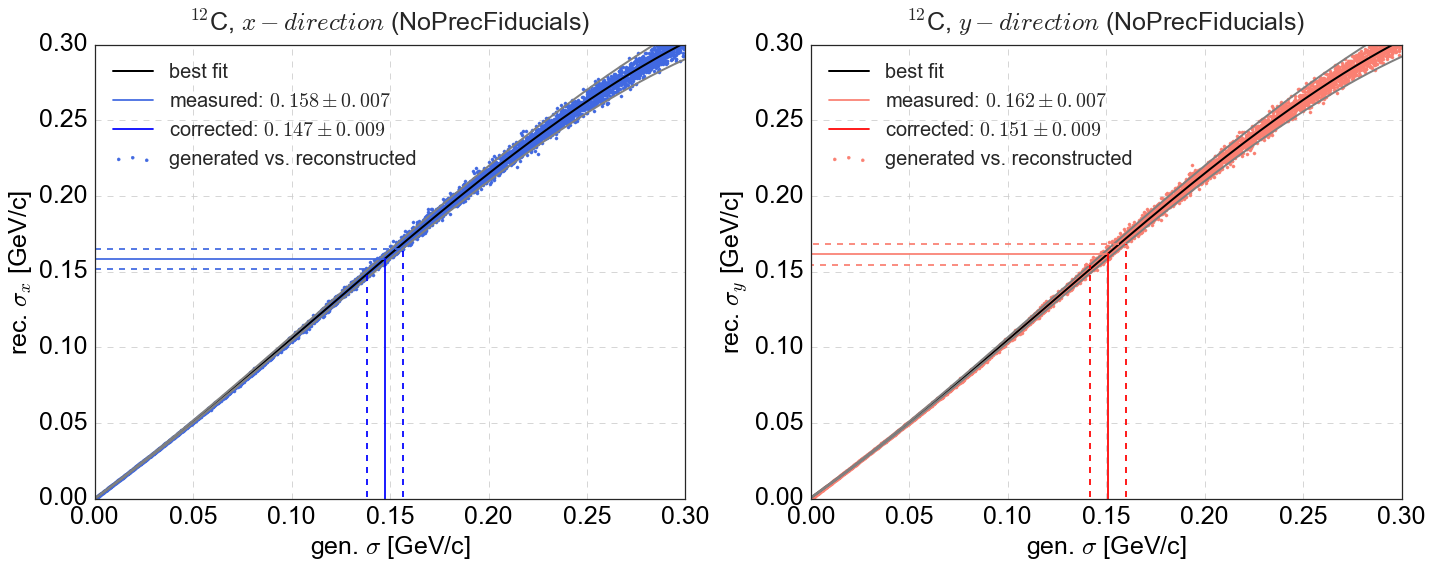

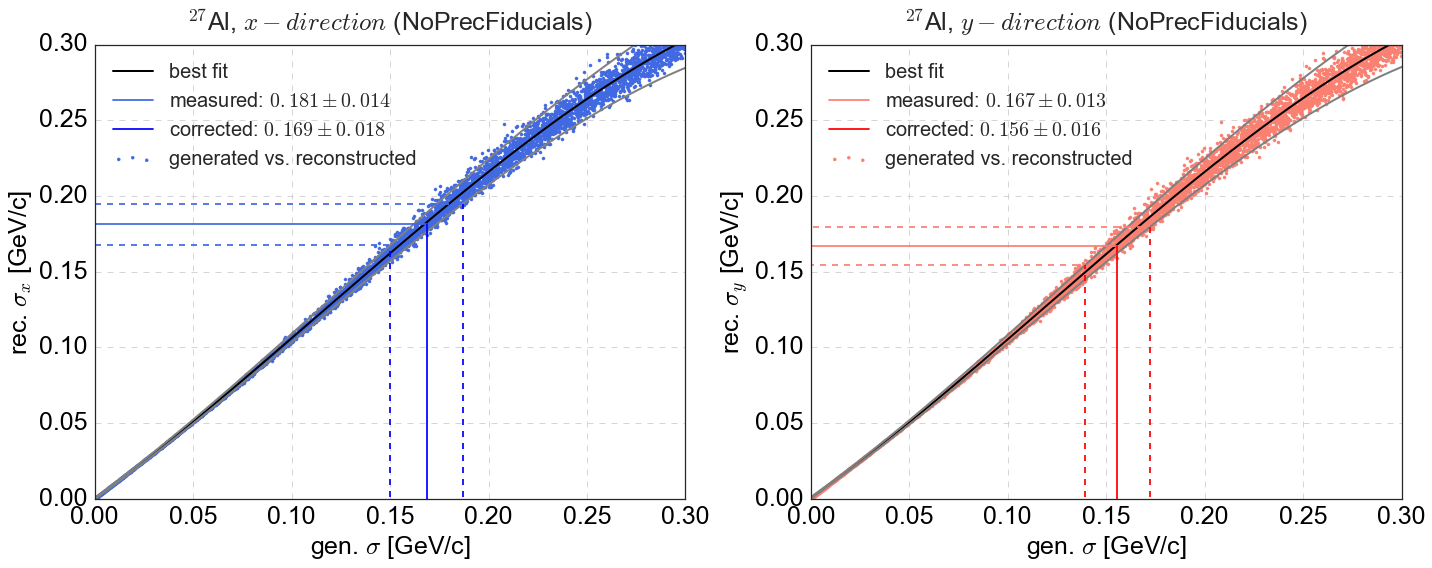

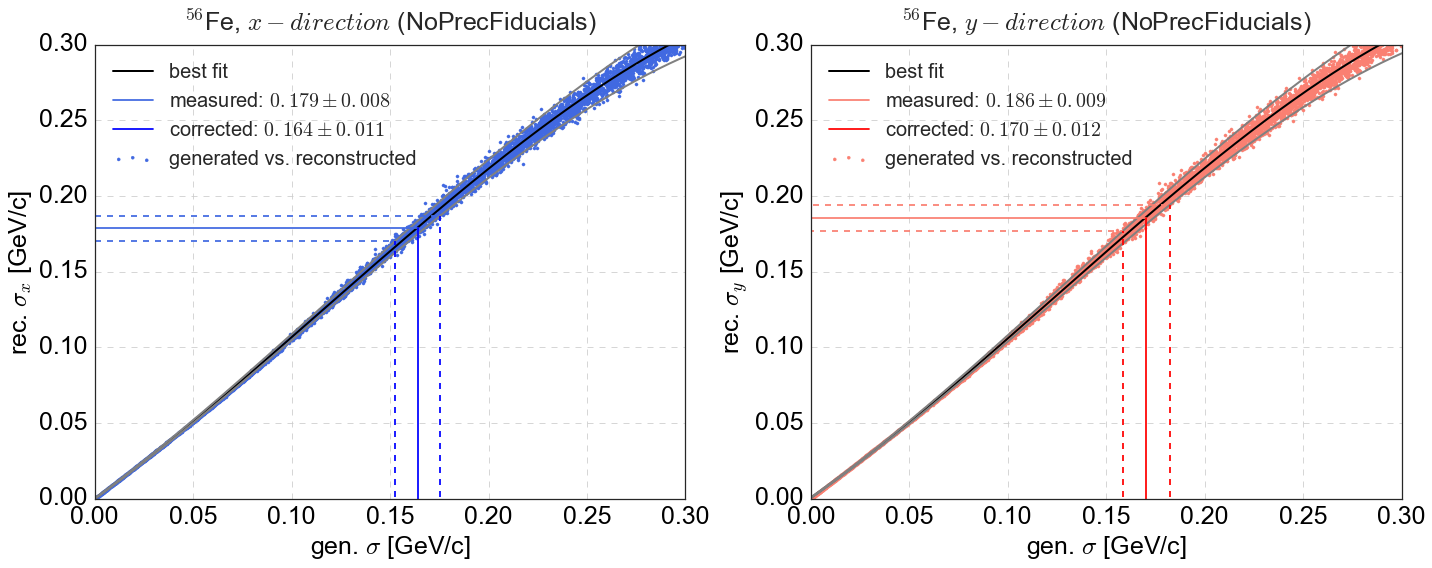

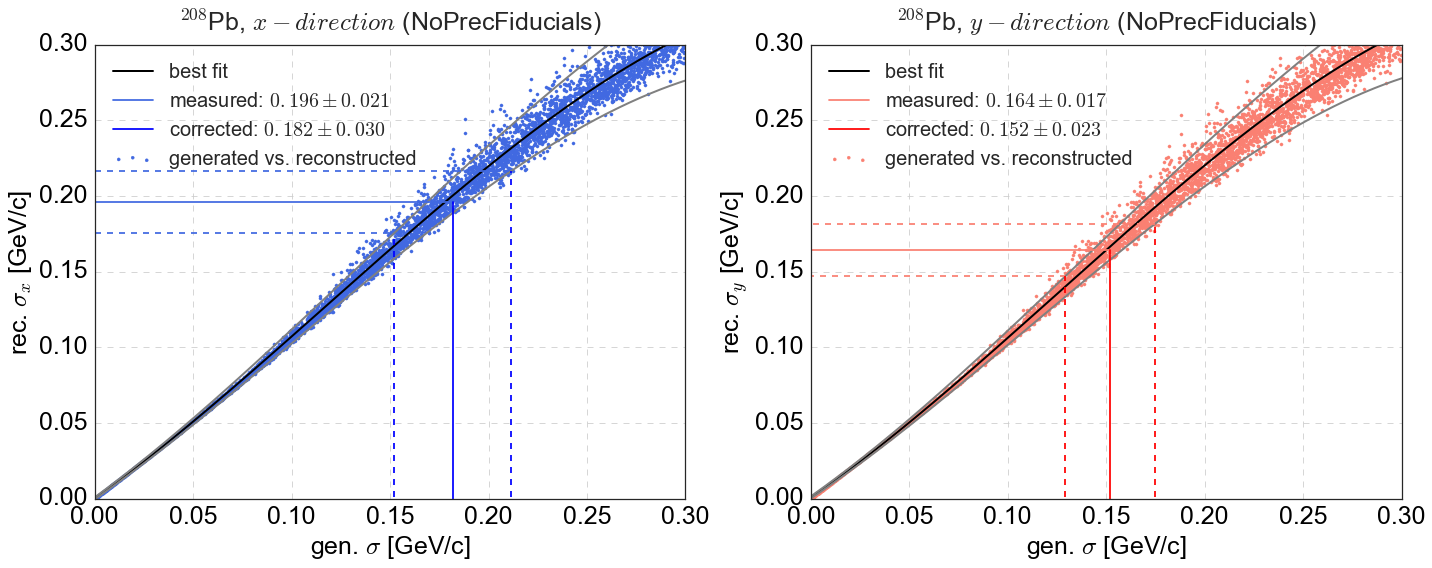

In [20]:
poly_degree = 3 # fit polynomial degree
confidence_interval = 0.95 # band around fit

for Fiducials in ["PrecFiducials","NoPrecFiducials"]:
    for A,target in zip([12,27,56,208],['C','Al','Fe','Pb']):#{
        test_name = "sims_300Pmiss600_"+target+"_"+Fiducials
        simulations_results=simulation_results[test_name]
        good_results = simulations_results[(simulations_results['rec_sigma_x']>0)
                                           &(simulations_results['rec_sigma_y']>0)]
        fig=plt.figure(figsize=(20,8))
    
        ax=fig.add_subplot(1,2,1)    
        corr_sigma_x, corr_sigma_x_err = plot_cm_direction(simulations_results=good_results
                                                           ,Fiducials=Fiducials                                                           
                                                           ,ax=ax,s=10                                                           
                                                           ,poly_degree=poly_degree,confidence_interval=confidence_interval                                                           
                                                           ,A=A,direction='x'                                                           
                                                           ,colors=['blue','royalblue']);

        ax=fig.add_subplot(1,2,2)    
        corr_sigma_y, corr_sigma_y_err = plot_cm_direction(simulations_results=good_results
                                                           ,Fiducials=Fiducials                                                                                                                                                                                 
                                                           ,ax=ax,s=10                                                           
                                                           ,poly_degree=poly_degree,confidence_interval=confidence_interval                                                           
                                                           ,A=A,direction='y'                                                           
                                                           ,colors=['red','salmon']);                        
    
        plt.tight_layout()            

In [21]:
for Fiducials in ['NoPrecFiducials','PrecFiducials']:
    sample = cm_parameters_with_correction[Fiducials]
    sample['sigma_x_final'] = sample['sigma_x_corrected']
    sample['sigma_x_final_Err'] = sample['sigma_x_corrected_err']
    sample['sigma_y_final'] = sample['sigma_y_corrected']
    sample['sigma_y_final_Err'] = sample['sigma_y_corrected_err']
    sample['sigma_t_final'] = 0.5*(sample['sigma_x_corrected']+sample['sigma_y_corrected'])
    sample['sigma_t_final_Err'] = 0.5*np.sqrt(np.square(sample['sigma_x_corrected_err'])+np.square(sample['sigma_y_corrected_err']))


In [22]:
cm_parameters_with_correction['PrecFiducials'][['sigma_t','sigma_tErr','sigma_t_final','sigma_t_final_Err']]

,sigma_t,sigma_tErr,sigma_t_final,sigma_t_final_Err
0,0.160008,0.004905,0.149683,0.007283
1,0.174126,0.009284,0.163314,0.014698
2,0.182190,0.006045,0.167867,0.009689
3,0.180172,0.013463,0.170243,0.023015


# add calculations...

In [23]:
ColleCalc = pd.DataFrame({'A':[4,12 , 27 , 56 , 208],
                        'allpairs':[0.110,0.140,0.144,0.146,0.145],
                        'nl00':[0.110,0.156,0.164,0.172,0.178]},
                         index = ['$^{4}$He','$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'])
CiofiCalc = pd.DataFrame({'A':[4 , 12 , 16 , 40 , 56 , 208], # 3 , 
                        's_t':[0.0899 , 0.1393 , 0.1272 , 0.1407 , 0.1328 , 0.1511]}, # 0.0724
                         index = ['$^{4}$He','$^{12}$C','$^{16}$O','$^{40}$Ca','$^{56}$Fe','$^{208}$Pb']) # '$^{3}$He',
MonizCalc = pd.DataFrame({'A':[12 , 40 , 208],
                        '3kF/4':[0.1658 , 0.1883 , 0.1988]},
                         index = ['$^{12}$C','$^{40}$Ca','$^{208}$Pb'])

BNL_Data = pd.DataFrame({'A':[12],'sigma_t_final':[0.143],'sigma_t_final_Err':[0.017]},index = ['$^{12}$C'])
HallA_Data = pd.DataFrame({'A':[12],'sigma_t_final':[0.136],'sigma_t_final_Err':[0.020]},index = ['$^{12}$C'])
Korover_Data = pd.DataFrame({'A':[4],'sigma_t_final':[0.100],'sigma_t_final_Err':[0.020]},index = ['$^{4}$He'])

WI_Data = pd.DataFrame({'A':[ 12 , 27 , 56 , 208], 
                        'sigma_t_final':[0.158 , 0.156 , 0.181 , 0.174], 
                        'sigma_t_final_Err':[0.012 , 0.019 , 0.011 , 0.016]}, 
                         index = ['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']) 

In [24]:
def plot_data(data , direction='t', Ashift=0, fmt='o', marker='^',color='red',
                       markersize=15, linewidth=4, 
                       vary=None , varyerr=None , label=None , facecolors=None ):
    ax.errorbar((data['A']+Ashift), data['sigma_'+direction+'_final'], yerr=data['sigma_t_final_Err'],                
                color=color, marker=marker,markersize=markersize,linewidth=linewidth
                , fmt=fmt,label=label)

def plot_data_assymeteric_err(data , Ashift=0, fmt='o', marker='^',color='red',
                       markersize=15, linewidth=4, 
                       vary=None , varyerr=None , label=None ):
    ax.errorbar((data['A']+Ashift), data['sigma_t_final'],
                yerr=[data['sigma_t_final_err_up'],data['sigma_t_final_err_dw']],                
                color=color, marker=marker,markersize=markersize,linewidth=linewidth, fmt=fmt,label=label)


def plot_calculation_line( data , varx='A',kind='nearest' , vary=None , color='blue' ,linestyle='--', label=None, linewidth=4):
    x = data[varx]
    y = data[vary]
    itp = interp1d(x,y, kind='linear')

    if kind is None:
        f = interp1d( x , y )
    else:
        f = interp1d( x , y ,kind=kind)

    window_size, poly_order = 101, 4
    xnew = np.linspace(x.min(),x.max(), num=500, endpoint=True)
    yy_sg = savgol_filter(itp(xnew), window_size, poly_order)
    plt.plot( xnew, yy_sg, linestyle, color=color , label=label, linewidth=linewidth )

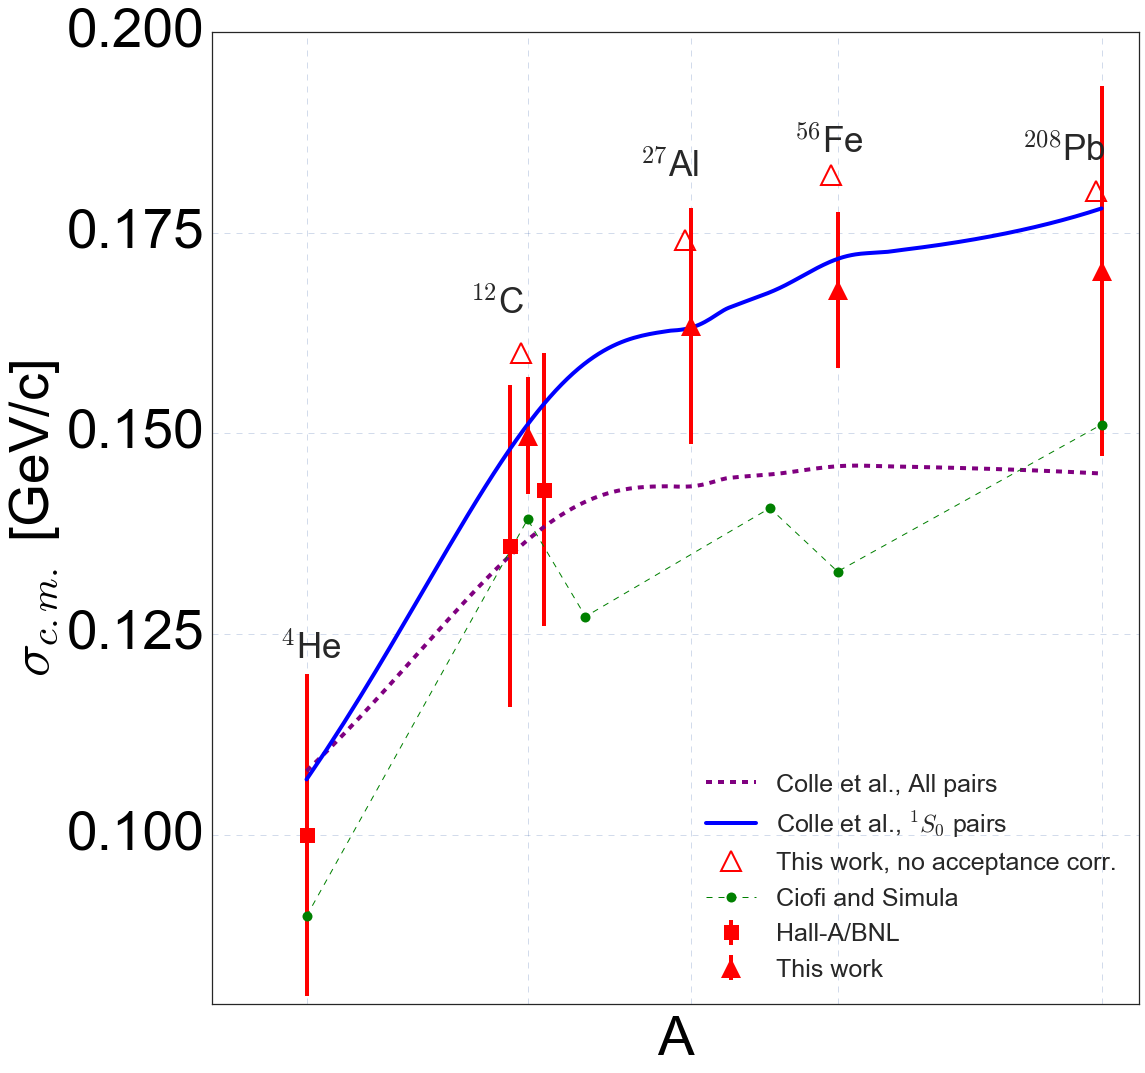

In [32]:
from scipy.interpolate import interp1d, Akima1DInterpolator,BarycentricInterpolator,splprep
s=30
fig, ax = plt.subplots(figsize=(16,15))
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='purple' ,label='Colle et al., All pairs')
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-', vary='nl00',label='Colle et al., $^1S_0$ pairs')
ax.errorbar(CiofiCalc.A, CiofiCalc.s_t,color='green',fmt='--o',ms=10,linewidth=1,label='Ciofi and Simula')

plot_data( data=BNL_Data, Ashift=1 , marker='s', label=None )
plot_data( data=HallA_Data, Ashift=-1 , marker='s' , label='Hall-A/BNL' )
plot_data( data=Korover_Data , marker='s' , label=None )

ax.plot(0.97*cm_pars['A'], cm_pars['sigma_t'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')
plot_data( data=cm_parameters_with_correction['PrecFiducials'], label='This work', markersize=20 )

ax.set_xscale('log')


set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=55 , xticks=[4,12,27,56,208],yticks=[0.1,0.125,0.15,0.175,0.2])
# ax.legend(fontsize=25,bbox_to_anchor=(1.05, 1), borderaxespad=0.,loc=2)
ax.legend(fontsize=25,loc='lower right')
ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)

ax.set_xlim(2.5,250);
ax.set_ylim(0.079,0.200);
ax.text(3.5,0.122,'$^4$He',fontsize=35)
ax.text(9,0.165,'$^{12}$C',fontsize=35)
ax.text(21,0.182,'$^{27}$Al',fontsize=35)
ax.text(45,0.185,'$^{56}$Fe',fontsize=35)
ax.text(140,0.184,'$^{208}$Pb',fontsize=35)
plt.tight_layout()
plt.savefig( figures_path + 'corrected_sigma_t_with_calculations.pdf')

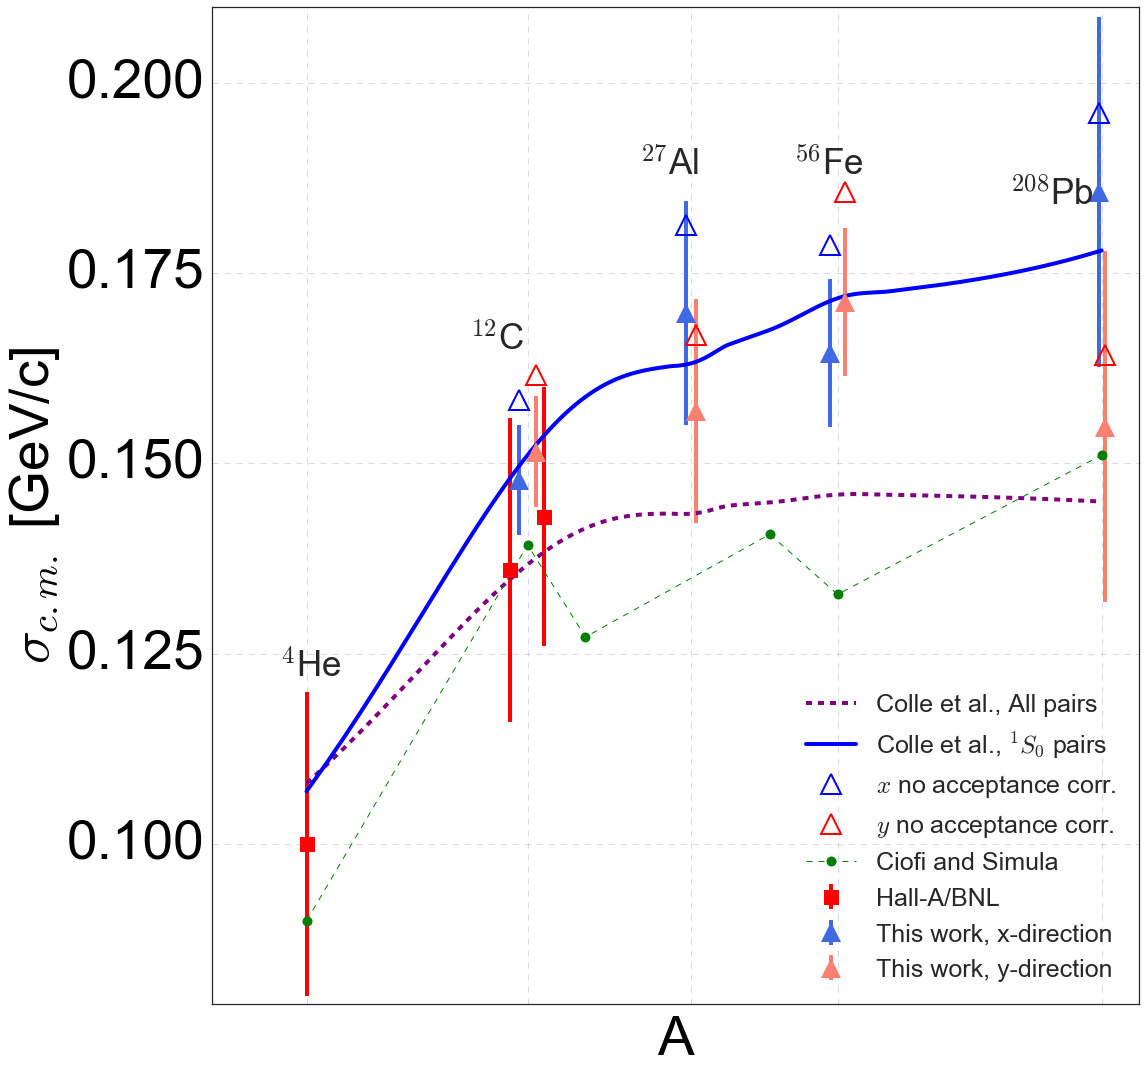

In [36]:
s=30
fig, ax = plt.subplots(figsize=(16,15))
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='purple' ,label='Colle et al., All pairs')
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-', vary='nl00',label='Colle et al., $^1S_0$ pairs')
ax.errorbar(CiofiCalc.A, CiofiCalc.s_t,color='green',fmt='--o',ms=10,linewidth=1,label='Ciofi and Simula')

plot_data( data=BNL_Data, Ashift=1 , marker='s', label=None )
plot_data( data=HallA_Data, Ashift=-1 , marker='s' , label='Hall-A/BNL' )
plot_data( data=Korover_Data , marker='s' , label=None )

ax.plot(cm_pars['A']+[-0.5,-0.7,-2,-3], cm_pars['sigma_x_unweighted'] ,mec='blue' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='$x$ no acceptance corr.')
plot_data( data=cm_parameters_with_correction['PrecFiducials'], Ashift=[-0.5,-0.7,-2,-3] , direction='x', label='This work, x-direction', color='royalblue',markersize=20 )
ax.plot(cm_pars['A']+[0.5,0.7,2,3], cm_pars['sigma_y_unweighted'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='$y$ no acceptance corr.')
plot_data( data=cm_parameters_with_correction['PrecFiducials'], Ashift=[0.5,0.7,2,3] ,direction='y', label='This work, y-direction', color='salmon', markersize=20 )
ax.set_xscale('log')

set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=55 , xticks=[4,12,27,56,208],yticks=[0.1,0.125,0.15,0.175,0.2])
ax.legend(fontsize=25,loc='lower right')

ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)

ax.set_xlim(2.5,250);
ax.set_ylim(0.079,0.210);
ax.text(3.5,0.122,'$^4$He',fontsize=35)
ax.text(9,0.165,'$^{12}$C',fontsize=35)
ax.text(21,0.188,'$^{27}$Al',fontsize=35)
ax.text(45,0.188,'$^{56}$Fe',fontsize=35)
ax.text(132,0.184,'$^{208}$Pb',fontsize=35)
plt.tight_layout()
plt.savefig( figures_path + 'corrected_sigma_xy_with_calculations.pdf')

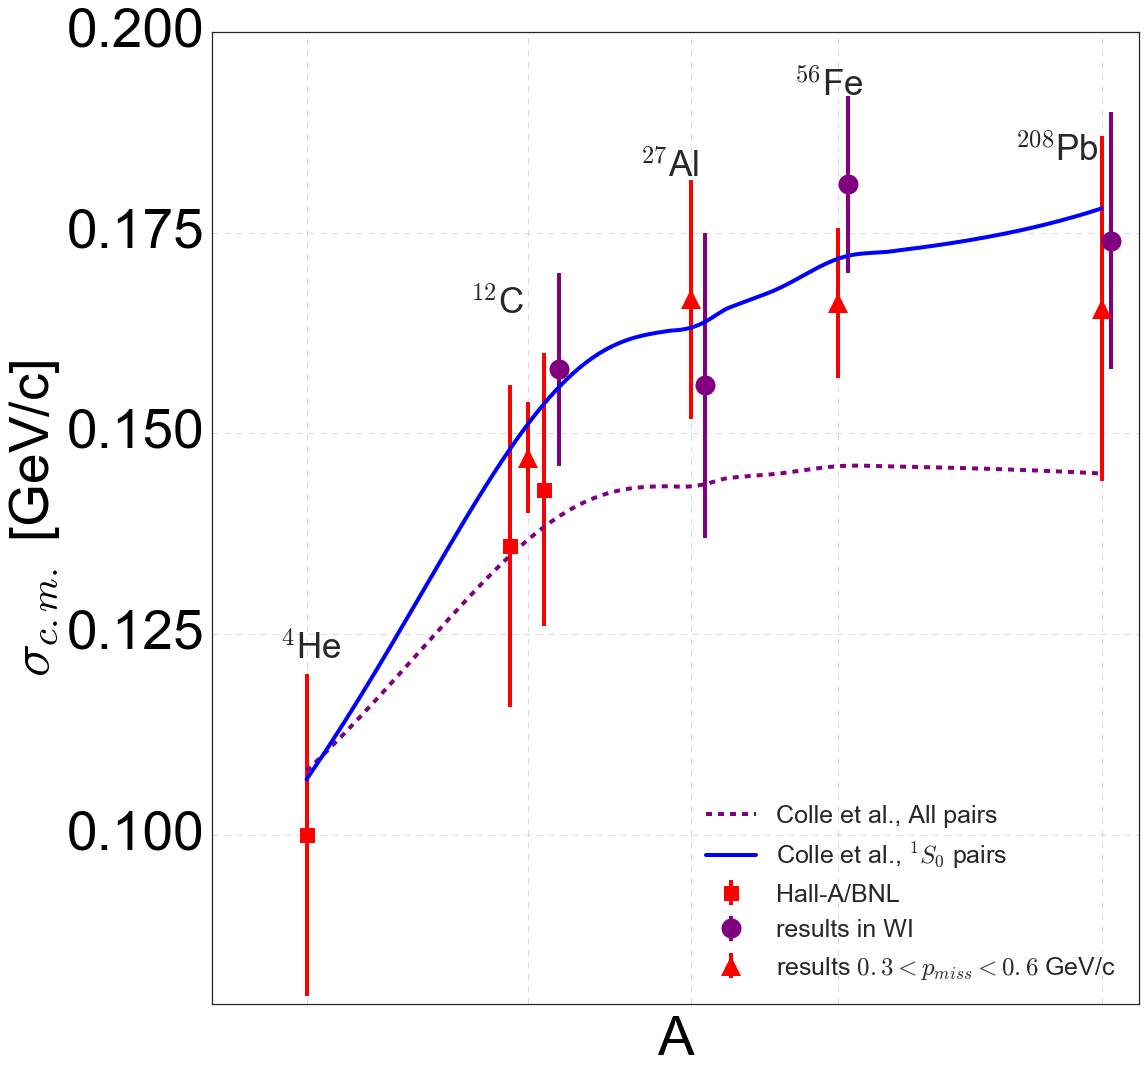

In [78]:
fig, ax = plt.subplots(figsize=(16,15))
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='purple' ,label='Colle et al., All pairs')
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-', vary='nl00',label='Colle et al., $^1S_0$ pairs')

plot_data( data=BNL_Data, Ashift=1 , marker='s', label=None )
plot_data( data=HallA_Data, Ashift=-1 , marker='s' , label='Hall-A/BNL' )
plot_data( data=Korover_Data , marker='s' , label=None )

plot_data( data=WI_Data, label='results in WI',Ashift=[2,2,3,10],  markersize=20 , marker='o', color='purple')
plot_data( data=cm_parameters_with_correction['PrecFiducials'], label='results $0.3<p_{miss}<0.6$ GeV/c', markersize=20 )

ax.set_xscale('log')

set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=55 , xticks=[4,12,27,56,208],yticks=[0.1,0.125,0.15,0.175,0.2])
ax.legend(fontsize=25, loc='lower right')
ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)

ax.set_xlim(2.5,250);
ax.set_ylim(0.079,0.200);
ax.text(3.5,0.122,'$^4$He',fontsize=35)
ax.text(9,0.165,'$^{12}$C',fontsize=35)
ax.text(21,0.182,'$^{27}$Al',fontsize=35)
ax.text(45,0.192,'$^{56}$Fe',fontsize=35)
ax.text(135,0.184,'$^{208}$Pb',fontsize=35)
plt.tight_layout()
plt.savefig( figures_path + 'corrected_sigma_t_vs_WI_results.pdf')

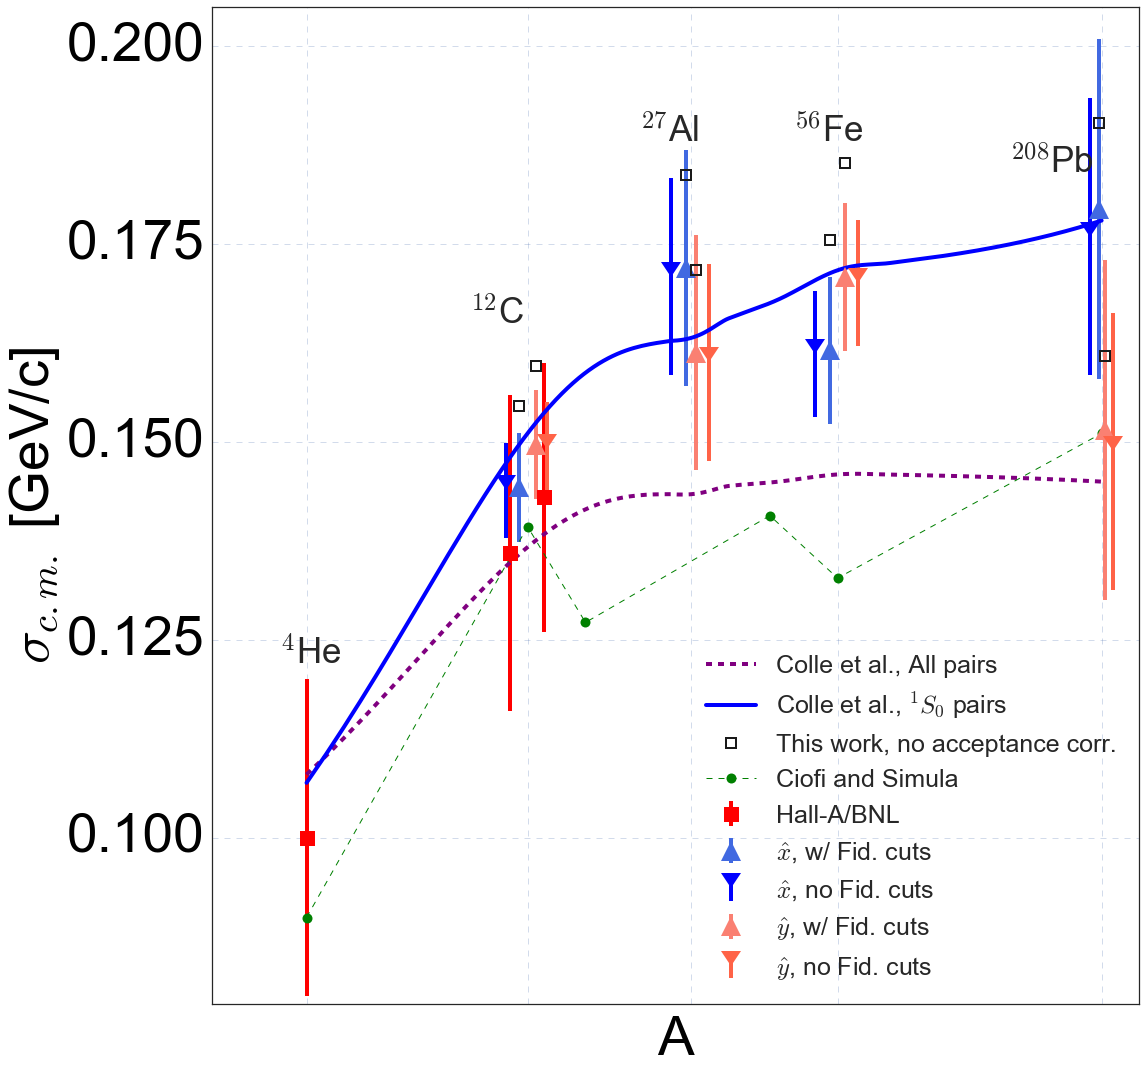

In [91]:
# comparison between analysis w/ fiducial cuts on the Precoil and analysis w/o them
# note that in the analysis w/o fiducial cuts, the simulation assumed 3\sigma around measured values
# and w/ fiducial cuts assumed 5\sigma around measured values
s=30
fig, ax = plt.subplots(figsize=(16,15))
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='purple' ,label='Colle et al., All pairs')
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-', vary='nl00',label='Colle et al., $^1S_0$ pairs')
ax.errorbar(CiofiCalc.A, CiofiCalc.s_t,color='green',fmt='--o',ms=10,linewidth=1,label='Ciofi and Simula')

plot_data( data=BNL_Data, Ashift=1 , marker='s', label=None )
plot_data( data=HallA_Data, Ashift=-1 , marker='s' , label='Hall-A/BNL' )
plot_data( data=Korover_Data , marker='s' , label=None )

ax.plot(cm_pars['A']+[-0.5,-0.7,-2,-3], cm_pars['sigma_x_unweighted'] ,color='red', marker='s',mfc='none',lw = 2, mew = 2, ms = 10, linewidth=0, label='This work, no acceptance corr.')
plot_data( data=cm_parameters_with_correction['PrecFiducials'], Ashift=[-0.5,-0.7,-2,-3] , direction='x', label='$\\hat{x}$, w/ Fid. cuts', color='royalblue',markersize=20  )
plot_data( data=cm_parameters_with_correction['NoPrecFiducials'], Ashift=[-1.2,-2.5,-6,-12] , direction='x', label='$\\hat{x}$, no Fid. cuts', color='blue',markersize=20 , marker=7)

plot_data( data=cm_parameters_with_correction['PrecFiducials'], Ashift=[0.5,0.7,2,3] ,direction='y', label='$\\hat{y}$, w/ Fid. cuts', color='salmon', markersize=20 )
plot_data( data=cm_parameters_with_correction['NoPrecFiducials'], Ashift=[1.2,2.5,6,12] , direction='y', label='$\\hat{y}$, no Fid. cuts', color='tomato',markersize=20 , marker=7)

ax.set_xscale('log')

set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=55 , xticks=[4,12,27,56,208],yticks=[0.1,0.125,0.15,0.175,0.2])
ax.legend(fontsize=25,loc='lower right')
ax.plot(cm_pars['A']+[0.5,0.7,2,3], cm_pars['sigma_y_unweighted'] ,color='red', marker='s',mfc='none',lw = 2, mew = 2, ms = 10, linewidth=0)
ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)

ax.set_xlim(2.5,250);
ax.set_ylim(0.079,0.205);
ax.text(3.5,0.122,'$^4$He',fontsize=35)
ax.text(9,0.165,'$^{12}$C',fontsize=35)
ax.text(21,0.188,'$^{27}$Al',fontsize=35)
ax.text(45,0.188,'$^{56}$Fe',fontsize=35)
ax.text(132,0.184,'$^{208}$Pb',fontsize=35)
plt.tight_layout()
plt.savefig( figures_path + 'corrected_sigma_xy_with_calculations_PrecFiducials_vs_NoPrecFiducials.pdf')

popt: [ -4.26747287e+00   1.44254404e+00   9.55951165e-01   1.00748883e-04]
perr: [ 0.06336821  0.02902715  0.00377552  0.00013214]
popt: [ -4.61571750e+00   1.67419020e+00   9.21158219e-01   6.71554173e-04]
perr: [ 0.06372803  0.02919198  0.00379696  0.00013289]
saved image to  /Users/erezcohen/Desktop/DataMining/alaHallAppSRCAnalysisNote/Figures/sigma_t_correction/sigma_t_corr_C_bands.pdf
popt: [ -4.43166019e+00   1.52889854e+00   9.50791270e-01   1.79908754e-04]
perr: [ 0.10822821  0.04930984  0.00636796  0.0002223 ]
popt: [ -4.73034817e+00   1.71641374e+00   9.22665227e-01   6.25574293e-04]
perr: [ 0.11014145  0.05018153  0.00648053  0.00022623]
saved image to  /Users/erezcohen/Desktop/DataMining/alaHallAppSRCAnalysisNote/Figures/sigma_t_correction/sigma_t_corr_Al_bands.pdf
popt: [ -4.73099438e+00   1.65162410e+00   9.48663723e-01   1.00750764e-04]
perr: [ 0.07667499  0.03510928  0.00454767  0.00015773]
popt: [ -5.14688480e+00   1.91395103e+00   9.12407005e-01   6.45692477e-04]
per

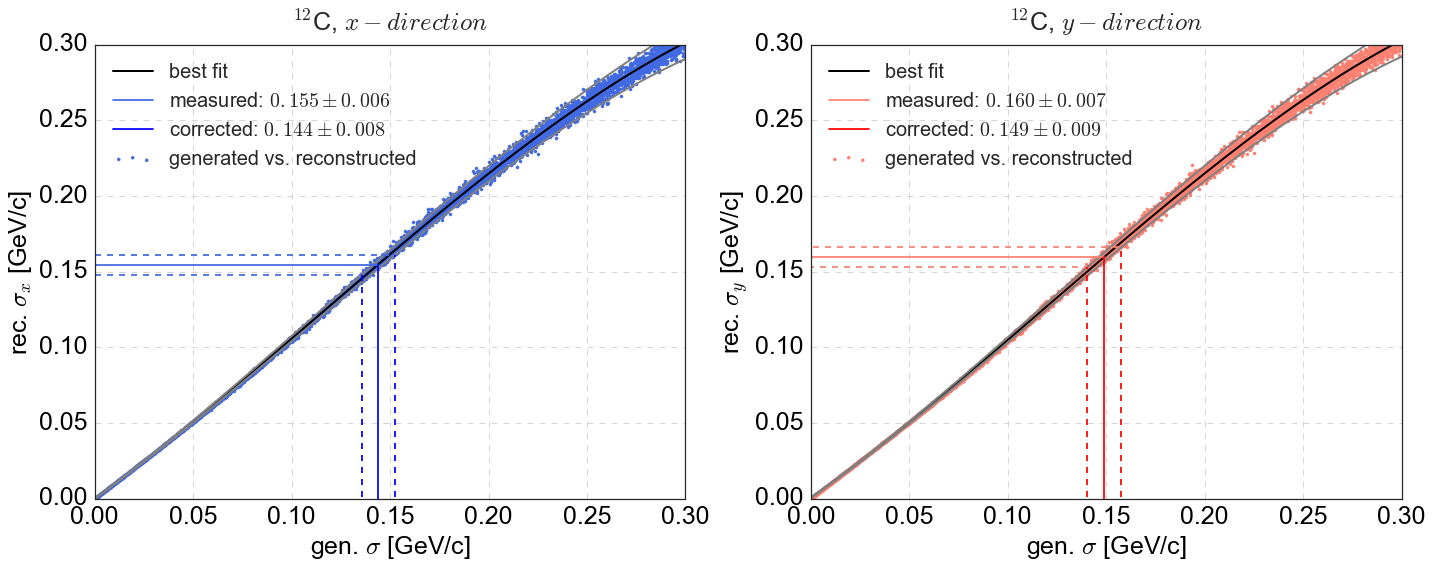

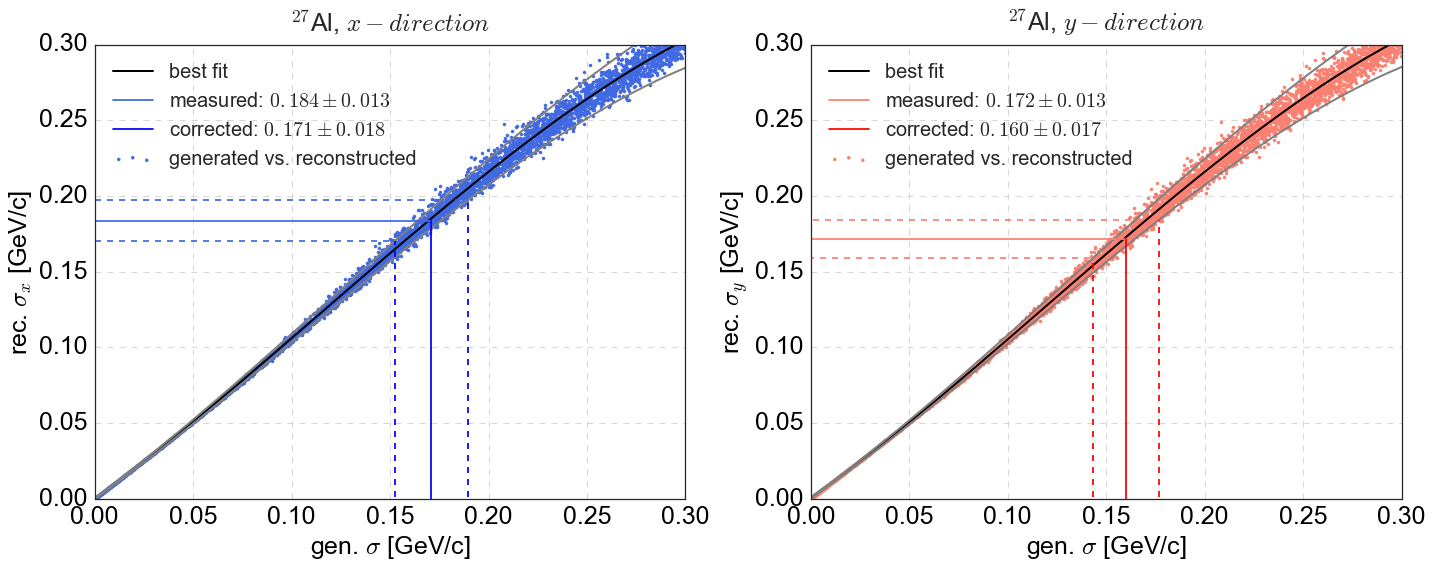

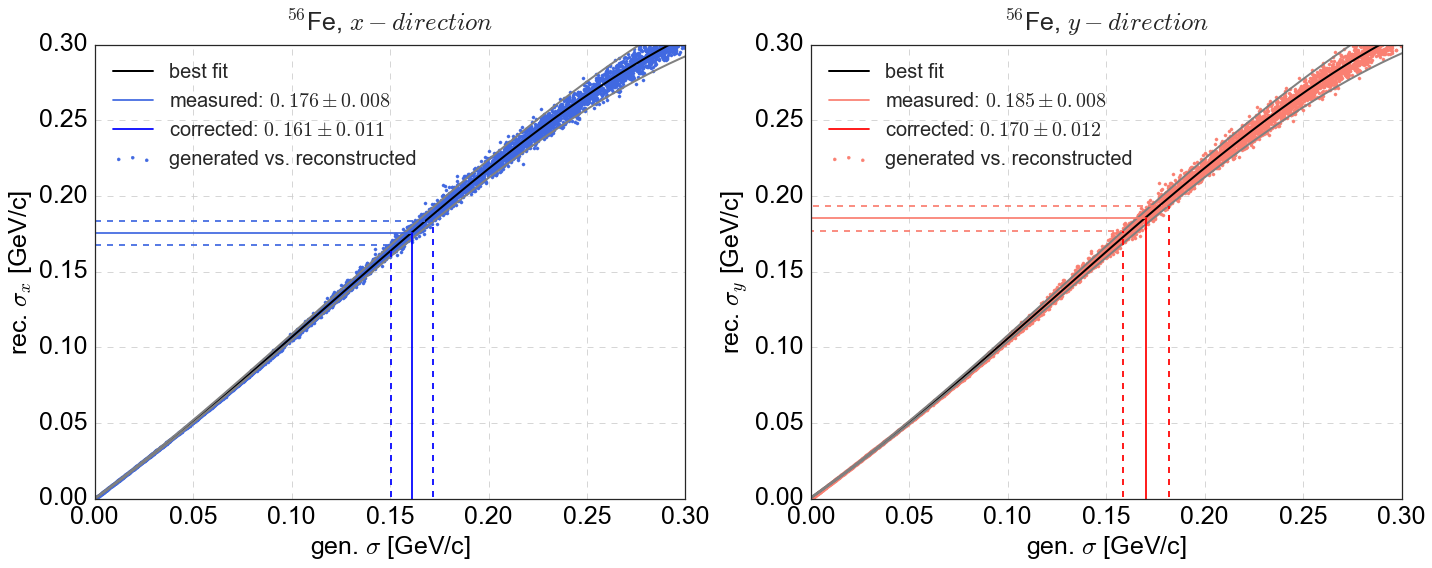

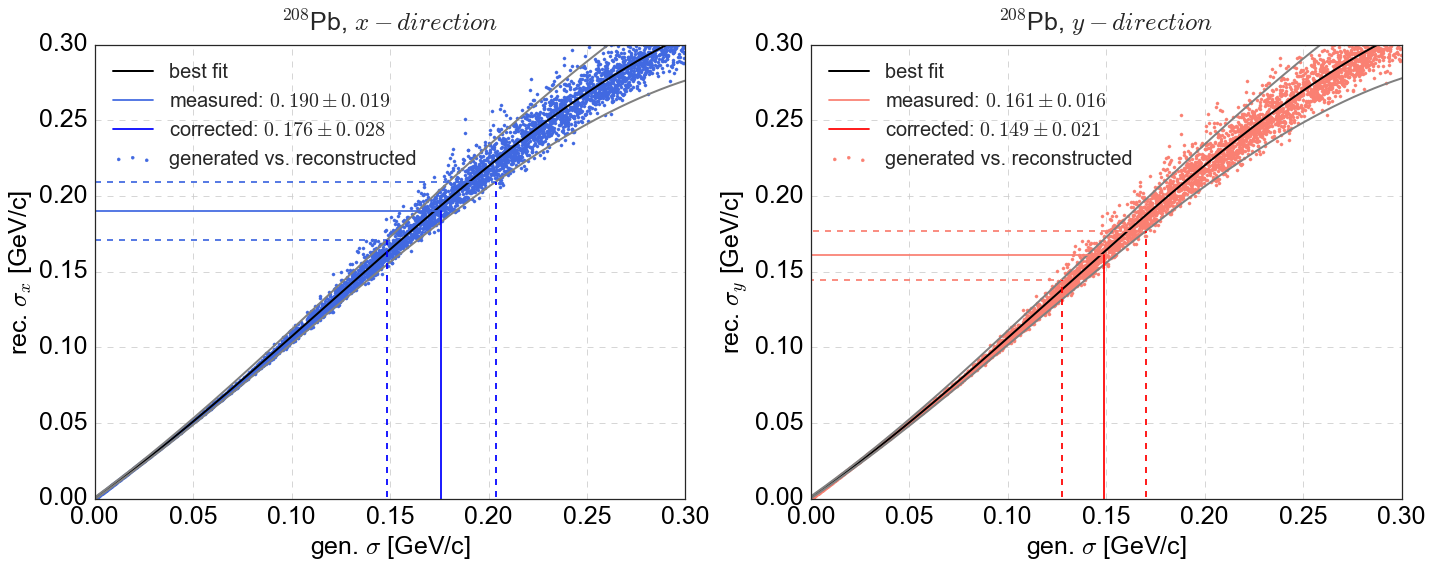

In [15]:
sigma_cm_corrected = dict()
sigma_cm_corrected_err = dict()

poly_degree = 3 # fit polynomial degree
confidence_interval = 0.95 # band around fit

for A,target_name in zip([12,27,56,208]                                                        
                         ,['C','Al','Fe','Pb']  
                        ):#{

    sigma_cm_corrected[target] = []    
    sigma_cm_corrected_err[target] = []        
    test_name = 'simulation_300Pmiss600_%s_runs_%d_%d'%( target_name, start_run, end_run)
    simulations_results=simulation_results[test_name]
    good_results = simulations_results[(simulations_results['rec_sigma_x']>0)&(simulations_results['rec_sigma_y']>0)]
    fig=plt.figure(figsize=(20,8))
    
    ax=fig.add_subplot(1,2,1)    
    corr_sigma_x, corr_sigma_x_err = plot_cm_direction(simulations_results=good_results
                                                                               ,ax=ax,s=10
                                                                               ,poly_degree=poly_degree,confidence_interval=confidence_interval
                                                                               ,A=A,direction='x'
                                                                               ,colors=['blue','royalblue']);

    ax=fig.add_subplot(1,2,2)    
    corr_sigma_y, corr_sigma_y_err = plot_cm_direction(simulations_results=good_results
                                                                               ,ax=ax,s=10
                                                                               ,poly_degree=poly_degree,confidence_interval=confidence_interval
                                                                               ,A=A,direction='y'
                                                                               ,colors=['red','salmon']);                        
    
    sigma_cm_corrected[target].append( 0.5*(corr_sigma_x+corr_sigma_y) )        
    sigma_cm_corrected_err[target].append( 0.5*np.sqrt( np.square(corr_sigma_x_err) + np.square(corr_sigma_y_err) ) )            
    plt.tight_layout()            
    outfilename = figures_path + 'sigma_t_corr_%s_bands.pdf'%target_name 
    plt.savefig(outfilename)
    print 'saved image to ',outfilename